In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import RobustScaler


from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")


In [76]:
df1 = pd.read_csv('stroke.csv')

In [77]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3,N,N,No,children,Rural,95.12,18.00,never smoked,0
1,Male,58,Y,N,Yes,Private,Urban,255.00,39.20,never smoked,1
2,Female,70,N,N,Yes,Private,Rural,69.04,35.90,formerly smoked,0
3,Female,52,N,N,Yes,Private,Urban,77.59,17.70,formerly smoked,0
4,Female,75,N,Y,Yes,Self-employed,Rural,103.00,27.00,never smoked,0


In [78]:
df1.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
29068,Female,10,N,N,No,children,Urban,58.64,20.40,never smoked,0
29069,Female,56,N,N,Yes,Govt_job,Urban,102.00,55.40,formerly smoked,0
29070,Female,82,Y,N,Yes,Private,Urban,252.00,28.90,formerly smoked,1
29071,Male,40,N,N,Yes,Private,Urban,99.16,33.20,never smoked,0
29072,Female,82,N,N,Yes,Private,Urban,79.48,20.60,never smoked,0


In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29073 entries, 0 to 29072
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             29073 non-null  object 
 1   age                29073 non-null  int64  
 2   hypertension       29073 non-null  object 
 3   heart_disease      29073 non-null  object 
 4   ever_married       29073 non-null  object 
 5   work_type          29073 non-null  object 
 6   Residence_type     29073 non-null  object 
 7   avg_glucose_level  29073 non-null  float64
 8   bmi                29073 non-null  float64
 9   smoking_status     29073 non-null  object 
 10  stroke             29073 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 2.4+ MB


In [80]:
#checking null values
df1.isnull().sum()


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [81]:
df1.describe()

,age,avg_glucose_level,bmi,stroke
count,29073.00,29073.00,29073.00,29073.00
mean,47.67,115.91,29.59,0.17
std,18.74,56.76,8.36,0.38
min,3.00,55.01,0.00,0.00
25%,32.00,80.36,25.00,0.00
50%,48.00,98.50,28.90,0.00
75%,62.00,118.00,33.90,0.00
max,82.00,281.59,92.00,1.00


In [82]:
df1['stroke'].value_counts()

0    24081
1     4992
Name: stroke, dtype: int64

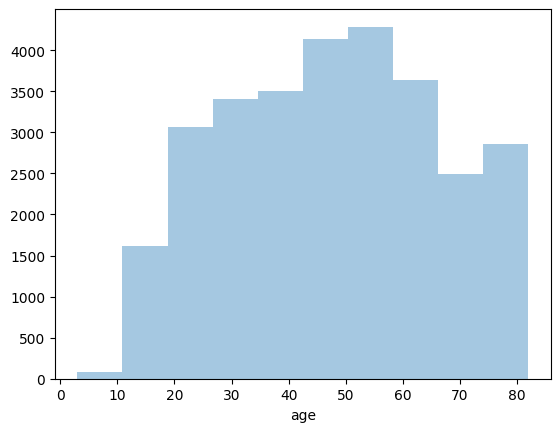

In [83]:
# histogram for the 'age' column
sns.distplot(df1['age'],
             bins = 10,
             kde = False);

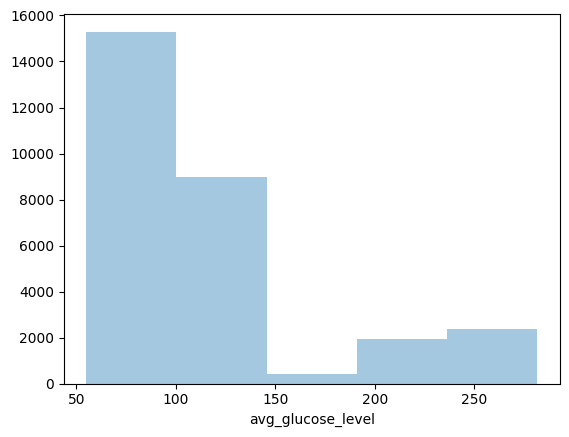

In [84]:
# histogram for the 'age_glucose_level' column
sns.distplot(df1['avg_glucose_level'],
             bins = 5,
             kde = False);

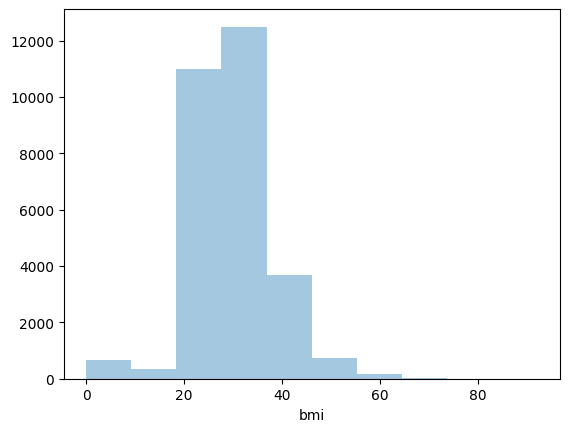

In [85]:
# histogram for the 'bmi' column
sns.distplot(df1['bmi'],
             bins = 10,
             kde = False);

In [86]:
df1['gender'].value_counts()

Female    17856
Male      11217
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

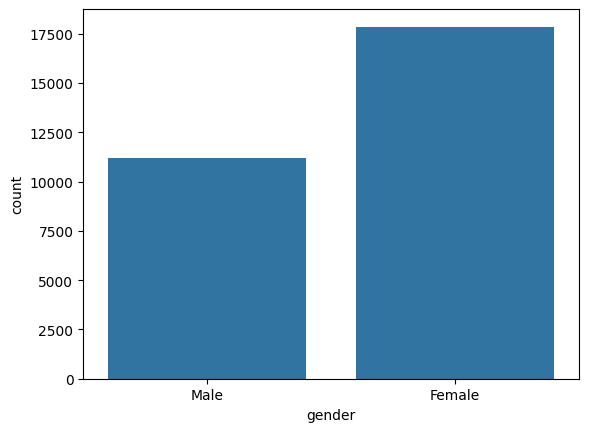

In [87]:
#countlplot for gender
sns.countplot( x = df1['gender'])





In [88]:
df1['hypertension'].value_counts()

N    25832
Y     3241
Name: hypertension, dtype: int64

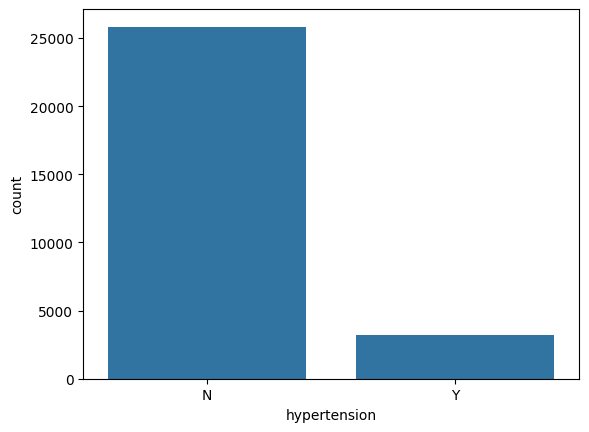

In [89]:
# Countplot for hypertension
sns.countplot( x = df1['hypertension']);

In [90]:
df1['heart_disease'].value_counts()

N    25310
Y     3763
Name: heart_disease, dtype: int64

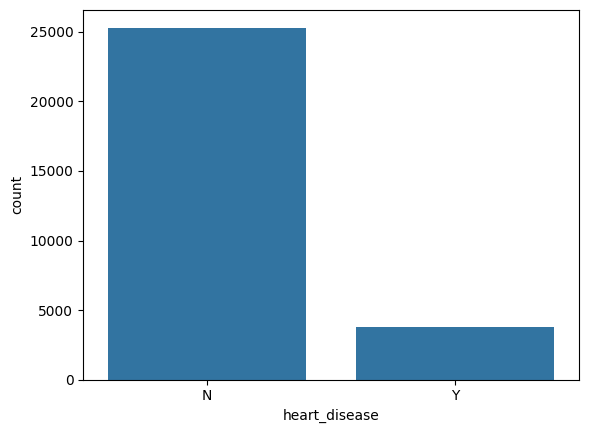

In [91]:
# Countplot for heart_disease
sns.countplot( x = df1['heart_disease']);

In [92]:
df1['ever_married'].value_counts()

Yes    21690
No      7383
Name: ever_married, dtype: int64

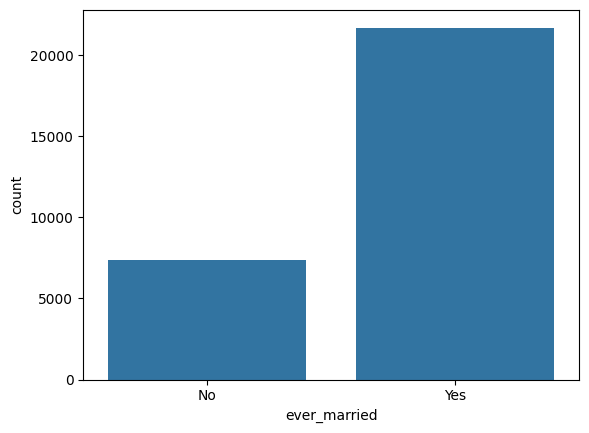

In [93]:
sns.countplot( x = df1['ever_married']);


In [94]:
df1['work_type'].value_counts()

Private          18954
Self-employed     5204
Govt_job          4196
children           618
Never_worked       101
Name: work_type, dtype: int64

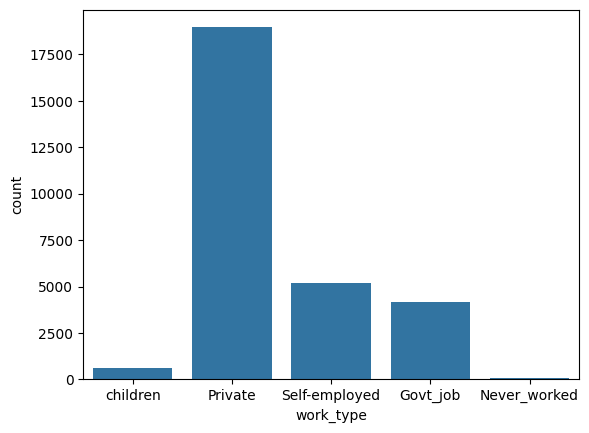

In [95]:
# Countplot for work_type
sns.countplot( x = df1['work_type']);

In [96]:
df1['Residence_type'].value_counts()

Urban    14595
Rural    14478
Name: Residence_type, dtype: int64

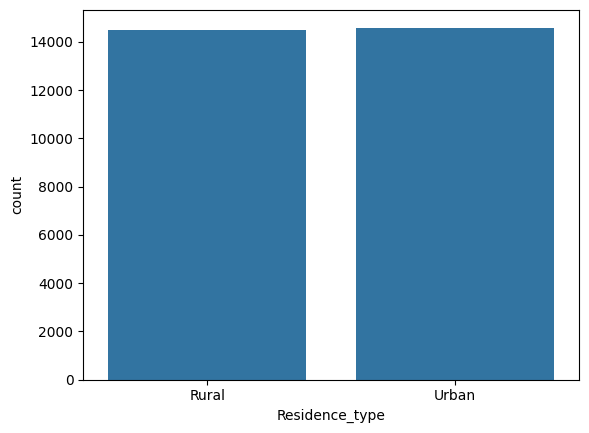

In [97]:
# Countplot for Residence_type
sns.countplot( x = df1['Residence_type']);

In [98]:
df1['smoking_status'].value_counts()

never smoked       15748
formerly smoked     7099
smokes              6226
Name: smoking_status, dtype: int64

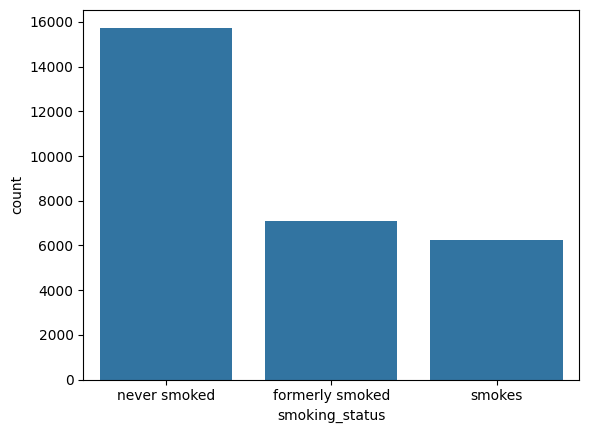

In [99]:
# Countplot for smoking_status
sns.countplot( x = df1['smoking_status']);

In [100]:
df1['stroke'].value_counts()

0    24081
1     4992
Name: stroke, dtype: int64

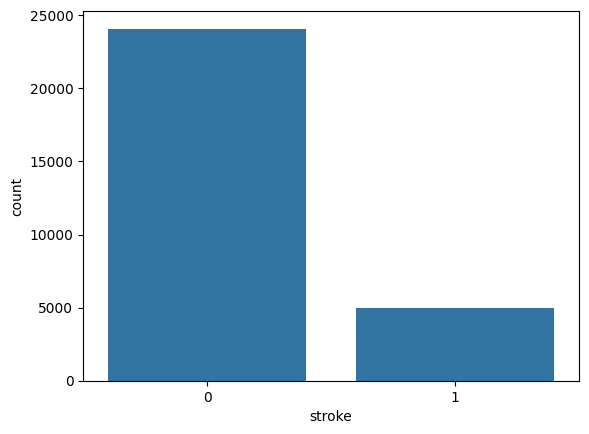

In [101]:
# Countplot for stroke
sns.countplot( x = df1['stroke']);

ShowCasing Correlation

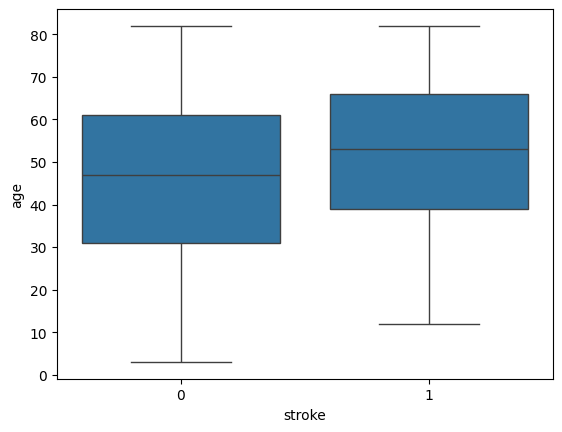

In [102]:
# Paired boxplot of stroke vs age
sns.boxplot(x = 'stroke',
            y = 'age',
            data = df1);

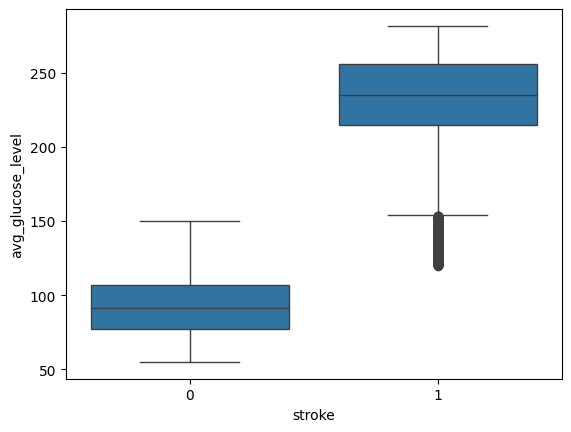

In [103]:
# Paired boxplot of stroke vs avg_glucose_level
sns.boxplot(x = 'stroke',
            y = 'avg_glucose_level',
            data = df1);

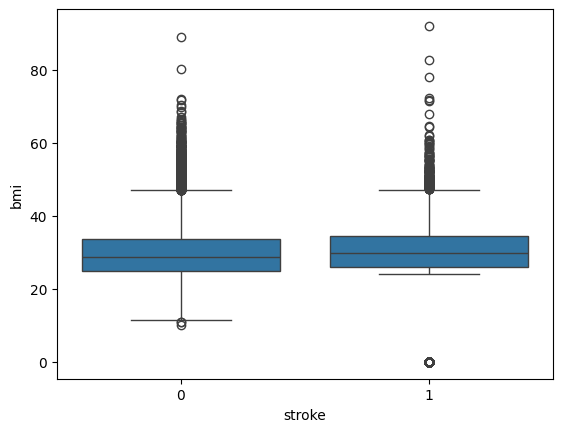

In [104]:
# Paired boxplot of stroke vs bmi
sns.boxplot(x = 'stroke',
            y = 'bmi',
            data = df1);

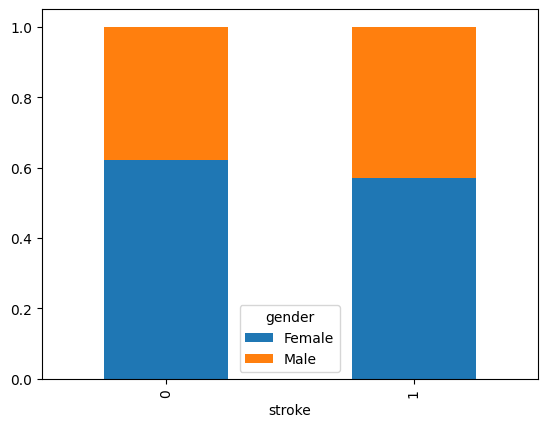

In [105]:
# Stacked Bar plot for stroke vs gender
pd.crosstab(df1['stroke'],
            df1['gender'],
            normalize='index').plot(kind='bar', stacked=True);

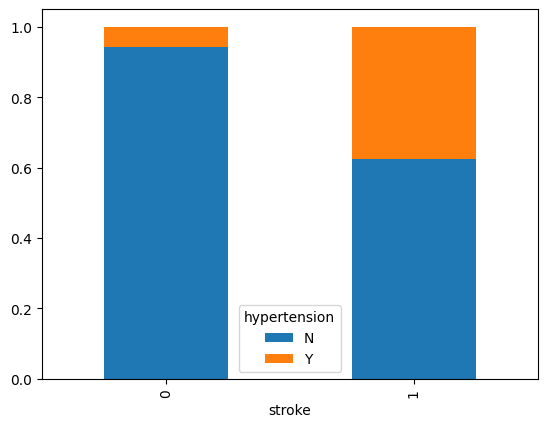

In [106]:
# Stacked Bar plot for stroke vs hypertension
pd.crosstab(df1['stroke'],
            df1['hypertension'],
            normalize='index').plot(kind='bar', stacked=True);

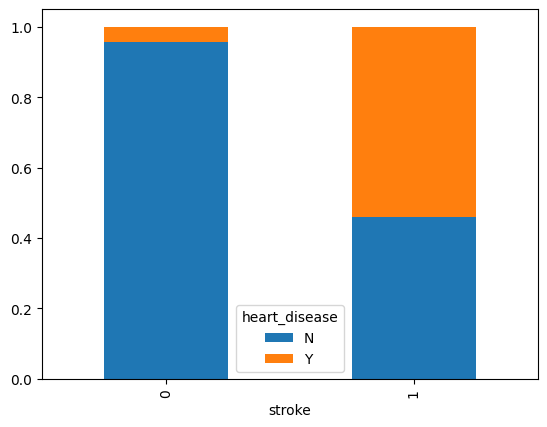

In [107]:
# Stacked Bar plot for stroke vs heart_disease
pd.crosstab(df1['stroke'],
            df1['heart_disease'],
            normalize='index').plot(kind='bar', stacked=True);

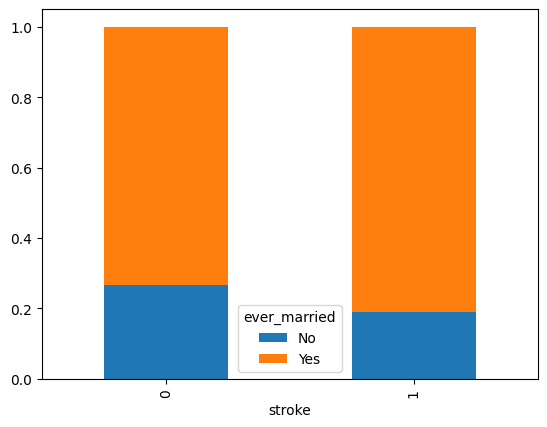

In [108]:
# Stacked Bar plot for stroke vs ever_married
pd.crosstab(df1['stroke'],
            df1['ever_married'],
            normalize='index').plot(kind='bar', stacked=True);

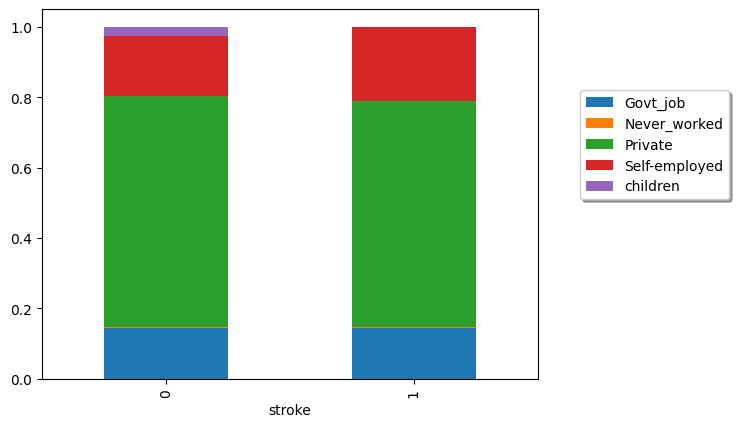

In [109]:
# Stacked Bar plot for stroke vs work_type
ax = pd.crosstab(df1['stroke'],
            df1['work_type'],
            normalize='index').plot(kind='bar', stacked=True)
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 0.8), shadow=True, ncol=1);

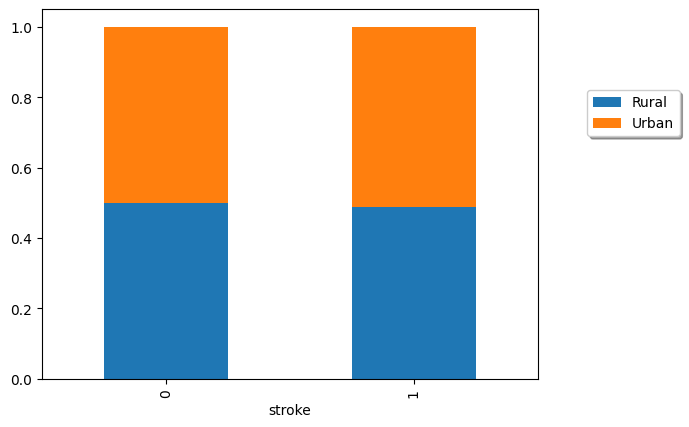

In [110]:
# Stacked Bar plot for stroke vs Residence_type
ax = pd.crosstab(df1['stroke'],
            df1['Residence_type'],
            normalize='index').plot(kind='bar', stacked=True);
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1);

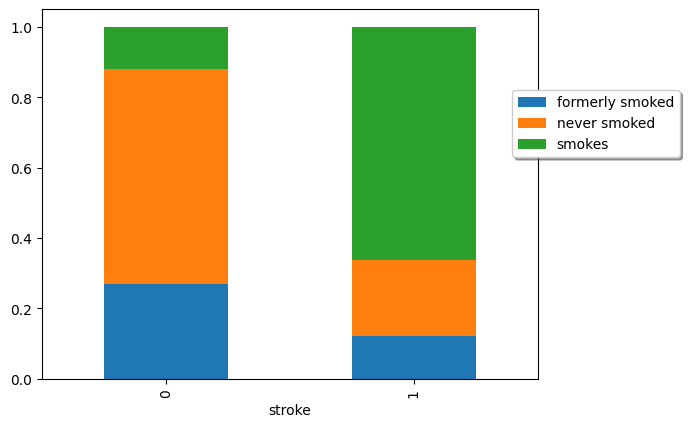

In [111]:
# Stacked Bar plot for stroke vs smoking_status
ax = pd.crosstab(df1['stroke'],
            df1['smoking_status'],
            normalize='index').plot(kind='bar', stacked=True);
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1);

In [112]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.1,random_state=0)

In [113]:
print(X.shape, X_train.shape, X_test.shape)

(29073, 14) (26165, 14) (2908, 14)


In [114]:
le = LabelEncoder()
df1['gender'] = le.fit_transform(df1['gender'])

Model Training Logistic Regression


In [143]:
model = LogisticRegression()

In [144]:
model.fit(X_train,Y_train)

LogisticRegression()

Model Evaluation Accuracy Score

In [155]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, Y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, Y_test)))


Training set score: 0.992
Test set score: 0.990


In [156]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, Y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, Y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, Y_test)))

Training set accuracy: 0.990
Test set accuracy: 0.989


In [157]:
logreg100 = LogisticRegression(C=100).fit(X_train, Y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, Y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, Y_test)))

Training set accuracy: 0.992
Test set accuracy: 0.991


Displaying Graph

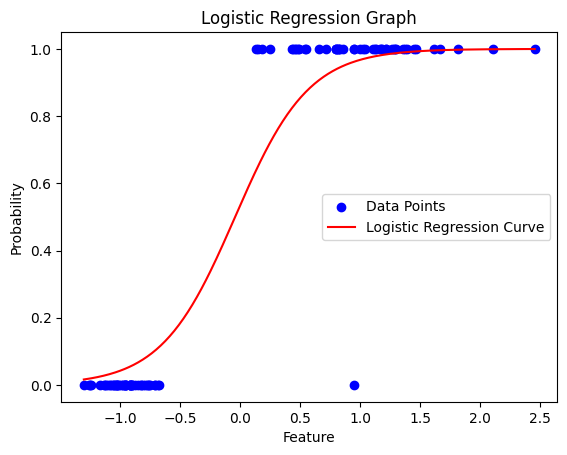

In [172]:
# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Plot the data points
plt.scatter(X, y, color='blue', marker='o', label='Data Points')

# Plot the logistic regression curve
X_test = np.linspace(min(X), max(X), 300).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]
plt.plot(X_test, y_prob, color='red', label='Logistic Regression Curve')

# Set plot labels and title
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.title('Logistic Regression Graph')

# Show legend
plt.legend()

# Show the plot
plt.show()


checking Model


In [177]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,0,4)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease
